# Google Analytics Customer Revenue Prediction

Presenting the initial data:

Data Fields: 
    fullVisitorIdv - A unique identifier for each user of the Google Merchandise Store. 
    channelGrouping - The channel via which the user came to the Store.
    date - The date on which the user visited the Store.
    device - The specifications for the device used to access the Store.
    geoNetwork - This section contains information about the geography of the user.
    sessionId - A unique identifier for this visit to the store.
    socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
    totals - This section contains aggregate values across the session.
    trafficSource - This section contains information about the Traffic Source from which the session originated.
    visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
    visitNumber - The session number for this user. If this is the first session, then this is set to 1.
    visitStartTime - The timestamp (expressed as POSIX time).

In [3]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from scipy.stats import kurtosis, skew, quantile

df = pd.read_csv("train_v2_cleaned.csv", index_col=0)

ImportError: cannot import name 'quantile'

In [ ]:
# Here we see the data types that we have in out dataset
df.info()

we have: 
        9   floats
        4   integers
        10  Object


In [ ]:
# we print the first five rows just to see that our dataset is ready for analysis. 
df.head()

# BROSWER -> TotalTransactionRevenue
For this first analysis, i will start by looking at 'browser' and see what relationship keep with the 'totalTransactionRevenue' it may not be relevant to know from what browser company purchased are being made, but maybe we can find some interesting patterns. 

In [ ]:
# first lets see how many users used which browser. For this section, we are only intreseted to see values that
# higer than 1k. The rest it doesn´t add any value in out dataset. 

df['browser'].value_counts()[:15] 

Chrome - 68.68%
Safari - 18,23%
Firefox - 3,74%

Here we see what we expected, most users are on Chrome followed by Safari. This may lead us to an idea where the the operating system may be between windows and Mac. People don usually download Safari browser on a Windows Machine. We will see this later when we see the relationship with 'operatingSystem'.

In [ ]:
# now let´s see an histogram of browser usage for every user in our dataset. 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

sns.countplot(df[df['browser'].isin(df['browser']
                                                       .value_counts()[:15].index.values)]['browser'], palette="hls") # It's a module to count the category's
plt.title("Most used browsers", fontsize=20) # Simply setting the tittle. 
plt.xlabel("Browser name", fontsize=16) # Adding a label to the X axis. 
plt.ylabel("Count", fontsize=16) #Adding a text to the Y axis. 
plt.xticks(rotation=45) # Simply adjust the text rotation to see it easier. 

plt.show() 

In [2]:
# Now lets get a coser look at the one that are most relevant to our dataset. Let´s see the firdst 5 Browsers
plt.figure(figsize=(14,6))

sns.countplot(df[df['browser'].isin(df['browser']
                                                       .value_counts()[:5].index.values)]['browser'], palette="hls") # It's a module to count the category's
plt.title("Most used browsers", fontsize=20) # Simply setting the tittle. 
plt.xlabel("Browser name", fontsize=16) # Adding a label to the X axis. 
plt.ylabel("Count", fontsize=16) #Adding a text to the Y axis. 
plt.xticks(rotation=45) # Simply adjust the text rotation to see it easier. 

plt.show() 

NameError: name 'plt' is not defined

Users in the dataset tend to visit the store through the Chrome Browser the most, followed by the Safari. This could lead us to a question where Safari users may come from a Macintosh operating system. Normally, safari is always installed in that OS. Altought Chrome is most demanded among users, this could also be used ehtother for Windows and MacOS platforms. We will see this when we cross OperatingSystem to see with are the most used by the consumers. 


In [12]:
#before we cross broswer with transactionRevenue to see which browser tend to make higher income to the store, 
#lets analyze the distribution of the totalTransactionRevenue and some statistical approaches. 

print("Transaction Revenue Min Value: ", 
      df[df['totalTransactionRevenue'] > 0]["totalTransactionRevenue"].min()) # printing the min value
print("Transaction Revenue Mean Value: ", 
      df["totalTransactionRevenue"].mean()) # mean value
print("Transaction Revenue Median Value: ", 
      df[df['totalTransactionRevenue'] > 0]["totalTransactionRevenue"].median()) # median value
print("Transaction Revenue Max Value: ", 
      df[df['totalTransactionRevenue'] > 0]["totalTransactionRevenue"].max()/100000) # the max value

# TODO i get really high numbers. I have to see how data is in 


Transaction Revenue Min Value:  1.2
Transaction Revenue Mean Value:  1.5558951243023724
Transaction Revenue Median Value:  52.38
Transaction Revenue Max Value:  0.4708206


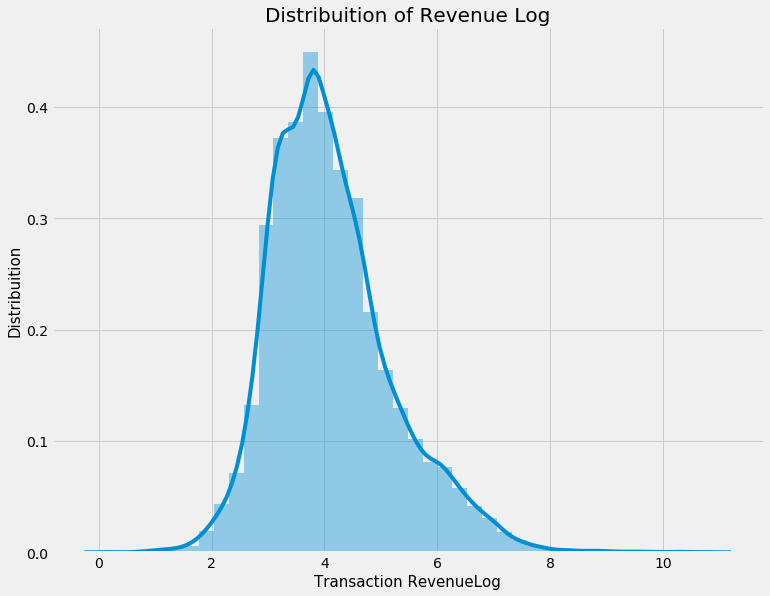

In [48]:
# let´s sea a distribution graph of transactionRevenue without the customers that generate zero transactions. 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,9))
plt.subplot(1,2,1)
# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(np.log(df[df['totalTransactionRevenue'] > 0]["totalTransactionRevenue"] + 0.01), bins=40, kde=True)
ax.set_xlabel('Transaction RevenueLog', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue Log", fontsize=20) #seting the title and size of font

plt.show()


In [52]:
# After visualizing the plot, it is also interesting to see the Skewness and the Kurtosis. 

print('Kurtosis: {}'.format(kurtosis(np.log(df[df['totalTransactionRevenue'] > 0]["totalTransactionRevenue"]))))
print('Skewness: {}'.format(skew((np.log(df[df['totalTransactionRevenue'] > 0]["totalTransactionRevenue"])))))

Kurtosis: 1.1414434324693348
Skewness: 0.8059761877514919


In [15]:
def CalcOutliers(df_num): 
    '''
    
    Leonardo Ferreira 20/10/2018
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [32]:
#Lets see how many outliers are in TotalTransactionRevenue before we cross this attribute with browsers. 
purchases = df[df['totalTransactionRevenue']> 0]
CalcOutliers(purchases['totalTransactionRevenue']) 

Identified lowest outliers: 0
Identified upper outliers: 63
Identified outliers: 63
Non-outlier observations: 16284
Total percentual of Outliers:  0.3869


# CROSSING BROWSER->TOTALTRANSACTIONREVENUE

Now let´s see what information we get from totalTransactionRevenue and browser.
Our question is: 
¿Does it have any relevance that one browser or the other is used to visits our store?

In [57]:
# code for getting only the purchases
purchases = df[df['totalTransactionRevenue']> 0]


# code for removing outliers
Q1 = purchases['totalTransactionRevenue'].quantile(0.05)
Q3 = purchases['totalTransactionRevenue'].quantile(0.95)
IQR = Q3 - Q1
purchases = purchases[purchases['totalTransactionRevenue'] > (Q1-1.5*IQR)]
purchases = purchases[purchases['totalTransactionRevenue'] < (Q3+1.5*IQR)]

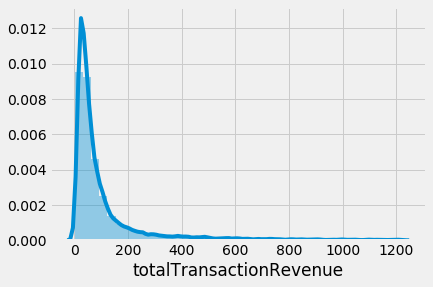

In [56]:
ax = sns.distplot((purchases[purchases['totalTransactionRevenue'] > 0]["totalTransactionRevenue"] + 0.01), bins=40, kde=True)

plt.show()

In [53]:
plt.figure(figsize=(13,6)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
Browser_Revenue = sns.boxenplot(x='browser', y='totalTransactionRevenue', 
                 data=purchases[(purchases['browser'].isin((purchases['browser'].value_counts()[:7].index.values)))])


Browser_Revenue.set_title('Browsers Name by Transactions Revenue', fontsize=20) # title and fontsize
Browser_Revenue.set_xticklabels(Browser_Revenue.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
Browser_Revenue.set_xlabel('Device Names', fontsize=18) # Xlabel
Browser_Revenue.set_ylabel('Trans Revenue(log) Dist', fontsize=18) #Ylabel
plt.xticks(rotation=45) # Simply adjust the text rotation to see it easier.


plt.show()

AttributeError: module 'seaborn' has no attribute 'boxenplot'

In [54]:
# Esta funcion fue cogida de un kernel de kaggle en el que imprime la gráfica en horizontal 
from plotly import tools
import plotly.plotly as py
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

ModuleNotFoundError: No module named 'plotly'

# Browser, Device Category & Operating system.

Here we analyse though an histogram, the individual count including the zero values and the cross with revenue. 
What we cant to know is if it meand anything the browser that is being used to visit the store and what income does it bring with it. In other words:
¿Does it add any relationship to the transactionRevenue total in out dataset?
¿Which browser makes more moeny in our store?
¿From which device catergory are most of the revenue made from?
¿Are Chrome Browsser the ones that make more revenue in the Store?
¿What operating system is mostly used and which is the one that makes more revenue?

In [14]:

# aqui imprimimos el browser y lo analizamos en conjunto con transactionRevenue
cnt_srs = df.groupby('browser')['totalTransactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), color="teal")
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), color="teal")
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), color="teal")

# aqui imprimirmos la categoria de desktop, tablet o mobil y hacemos un cruce con trasactionRevenue. 
cnt_srs = df.groupby('deviceCategory')['totalTransactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"].head(10), color="#484849")
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), color="#484849")
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(10), color="#484849")

# Hacemos un conteo de OS y lo cruzamos con transactionRevenue.
cnt_srs = df.groupby('operatingSystem')['totalTransactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), color="#36729C")
trace8 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10),color="#36729C")
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10),color="#36729C")

fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device Browser - Count", "Device Browser - Non-zero Revenue Count", "Device Browser - Mean Revenue",
                                          "Device Category - Count",  "Device Category - Non-zero Revenue Count", "Device Category - Mean Revenue", 
                                          "Device OS - Count", "Device OS - Non-zero Revenue Count", "Device OS - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Device Plots")
py.iplot(fig, filename='device-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



BROWSER: 

Chrome seems to be the most frequent browser of choice. But it also seems to be the browser that makes the most zero-vale revenue. But what we do see is when we cross the 'totalTransactionRevenue' with 'browser'. Our result in the graph indicate that amog all of the users with different browsers, the ones that make a higher income to the store is Firefox with a transactionRevenue of aproximately 3.68M followd by Chrome with 1.9M. Earlier we though it could be a possibility that Chrome would be amog the one that incrementes de transactionRevenue by far, but the count of browsers indicated that FIrefox, with only 56k users, make the most of the Transactionrevenue compared to Chrome with 1.03M users. 

It is a big difference between these two browsers. 

DEVICE CATEGORY: 

Aproximately 60% of the platforms used to visit the store are from a desktop. Desktop seems to be the platform that makes the most zero-vale revenue compared with the other two. Where it gets interesting is when we cross the device category with transacionRevenue. It seems that mobile and tablet its not an option whenever we want to make a purchase at the store. These are being made through a desktop platform.


OPERATING SYSTEM:

In 'browser' count we got that Chrome, Safari and Firefox where the ones that are leading by the consumers. We say that most of Safari browsers are bing used in a Macintosh OS for the most part. It´s our guess. Another guess is that Chrome could also be installed in a MacOS platform. Its just a guess. Our reults tells us something dufferent to our guess. As expected, Windows and MacOS are leading the comsumer demands as an Operating system of choice. As well as the other two atributes, zero values doesnt add any value to our dataset when it comes to making an histogrm. But it does add some interesting resulta when we see which operating systems are making the most of the transactionRevenue. 

Chrome OS es leading the transactionRevenue with an amount of aproximately 5.5M followed by Macintosh with 3.3M. 

CONCLUSION: 

Meaning that these two Operating Systems Chrome OS and Macintosh, use Firefox and Chrome to make their purchases from a desktop platform for the most part. Let´s analyse further this to see if our conlcusion get closer to the real data. 

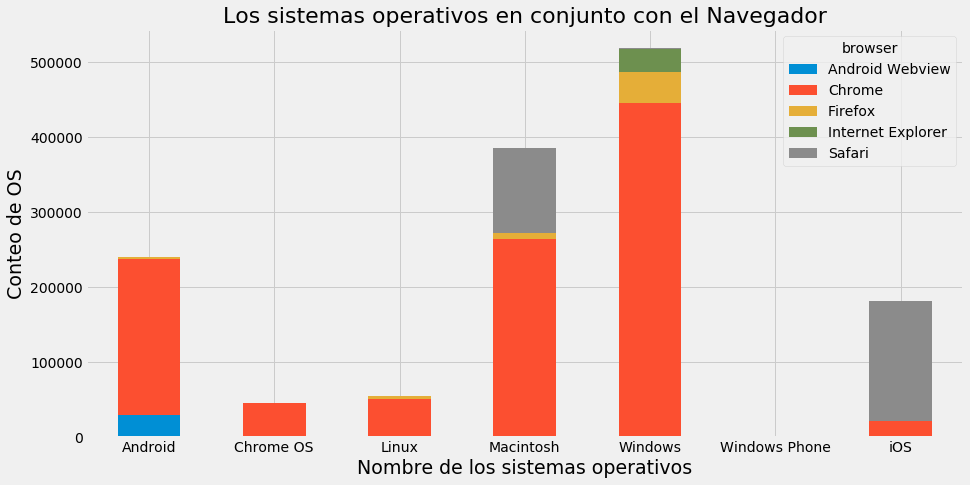

In [20]:
# analyze the the 'operatingSystem' with the 'browsers'
import matplotlib.pyplot as plt


# At index I will use isin to substitute the loop and get just the values with more than 1%
crosstab_eda = pd.crosstab(index=df[df['operatingSystem']\
                                          .isin(df['operatingSystem']\
                                                .value_counts()[:8].index.values)]['operatingSystem'], 
                           
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df[df['browser'].isin(df['browser']\
                                                                            .value_counts()[:5].index.values)]['browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Los sistemas operativos en conjunto con el Navegador", fontsize=22) # adjusting title and fontsize
plt.xlabel("Nombre de los sistemas operativos", fontsize=19) # adjusting x label and fontsize
plt.ylabel("Conteo de OS", fontsize=19) # adjusting y label and fontsize
plt.xticks(rotation=0) # Adjust the xticks, rotating the labels

plt.show() # rendering

Ahora hagamos lo mismo pero con la categorias Desktop, Tablet y Mobile. 

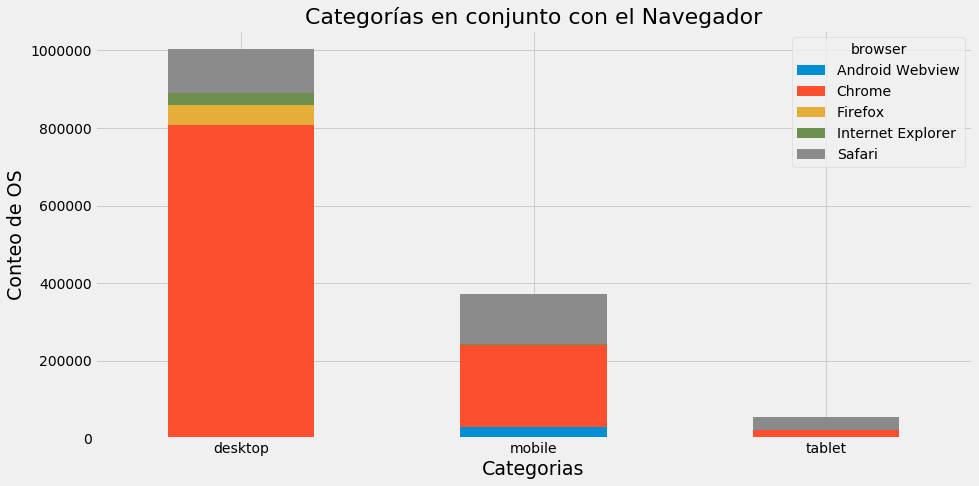

In [21]:
# At index I will use isin to substitute the loop and get just the values with more than 1%
crosstab_eda = pd.crosstab(index=df[df['deviceCategory']\
                                          .isin(df['deviceCategory']\
                                                .value_counts()[:3].index.values)]['deviceCategory'], 
                           
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df[df['browser'].isin(df['browser']\
                                                                            .value_counts()[:5].index.values)]['browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Categorías en conjunto con el Navegador", fontsize=22) # adjusting title and fontsize
plt.xlabel("Categorias", fontsize=19) # adjusting x label and fontsize
plt.ylabel("Conteo de OS", fontsize=19) # adjusting y label and fontsize
plt.xticks(rotation=0) # Adjust the xticks, rotating the labels

plt.show() # rendering

Definately we see that our conclusion after makgin a separate hisogram is true. Chrome is the most used browser among users but still, our value is applied to Firefox being the browser in which most of the transactionRevenue is being made. 

# Country
In this section we are going to see what countries are controbuting to the revenue the most, we will also see what devices are being used by those countries. 